In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scripts.IsingModel import IsingSimulation

ModuleNotFoundError: No module named 'scripts'

In [2]:
bold = np.loadtxt('../data/50003_timeseries.txt')
bold_bin = np.zeros(bold.shape)
bold_bin[np.where(bold>=0)] = 1
bold_bin[np.where(bold<0)] = -1
n_rois = bold_bin.shape[1]
n_timesteps = bold_bin.shape[0]

In [3]:
beta = 1
state = bold_bin
state.shape

(196, 116)

In [40]:
# globals
def loss(J, s):
    term1 = 0
    term2 = 0
    for t in range(n_timesteps):
        C = beta * J @ s[t].T
        term1 += C @ s[t].T
        term2 -= np.sum(np.log(np.exp(C) + np.exp(-C)))
    return (term1+term2)/n_timesteps

def gradient(J, s):
    grad = np.zeros((n_rois, n_rois))
    for t in range(n_timesteps):
        C = beta * J @ s[t].T
#         print(C.shape)
        grad += np.outer(bold_bin[1], bold_bin[1].T) - np.outer(np.tanh(C).T, s[t])
#     print(grad.shape)
    return grad * beta/n_timesteps

In [52]:
def gradient_ascent(max_iterations,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8, threshold=0.005):
    
    w = w_init
    w_history = [w]
    f_history = [obj_func(w,extra_param)]
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations:
        delta_w = learning_rate*grad_func(w,extra_param)
#         print(delta_w)
        w = w+delta_w
        
        # store the history of w and f
        w_history.append(w)
        f_history.append(obj_func(w,extra_param))
        print(f"loss: {f_history[-1]}")
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

In [54]:
J = np.random.uniform(0, 1, size=(n_rois, n_rois))
J = (J + J.T)/2 # making it symmetric
np.fill_diagonal(J, 1)
# print(J.shape)
start = timeit.default_timer()

#Your statements here

J_hist, f_hist = gradient_ascent(500, J, loss, gradient, extra_param=bold_bin, learning_rate=0.0005)
stop = timeit.default_timer()
print(stop - start)

loss: -1087.4017200445724
loss: -1086.8460404639825
loss: -1086.290566945403
loss: -1085.7353002519365
loss: -1085.1802412074815
loss: -1084.6253906976413
loss: -1084.0707496702246
loss: -1083.5163191352185
loss: -1082.9621001641026
loss: -1082.408093888404
loss: -1081.8543014973375
loss: -1081.300724234527
loss: -1080.7473633937075
loss: -1080.1942203134493
loss: -1079.6412963709824
loss: -1079.0885929752699
loss: -1078.5361115595672
loss: -1077.9838535737663
loss: -1077.4318204769663
loss: -1076.8800137306664
loss: -1076.3284347931103
loss: -1075.777085115286
loss: -1075.2259661390453
loss: -1074.67507929773
loss: -1074.1244260196747
loss: -1073.5740077346998
loss: -1073.0238258836653
loss: -1072.473881930949
loss: -1071.9241773795743
loss: -1071.3747137885723
loss: -1070.82549279209
loss: -1070.2765161196198
loss: -1069.7277856167436
loss: -1069.179303265741
loss: -1068.6310712054283
loss: -1068.0830917496185
loss: -1067.5353674036783
loss: -1066.9879008786463
loss: -1066.4406951024

loss: -927.8894878817505
loss: -927.4736843765345
loss: -927.0582060036561
loss: -926.6430533647772
loss: -926.2282270928257
loss: -925.8137278506247
loss: -925.399556329534
loss: -924.9857132480734
loss: -924.5721993505624
loss: -924.1590154057583
loss: -923.7461622055577
loss: -923.3336405636919
loss: -922.921451314512
loss: -922.509595311764
loss: -922.098073427451
loss: -921.6868865507367
loss: -921.2760355868904
loss: -920.8655214562884
loss: -920.455345093478
loss: -920.0455074462692
loss: -919.636009474898
loss: -919.2268521512249
loss: -918.8180364579769
loss: -918.4095633880506
loss: -918.0014339438296
loss: -917.5936491365593
loss: -917.1862099857556
loss: -916.7791175186421
loss: -916.3723727696188
loss: -915.9659767797664
loss: -915.5599305963634
loss: -915.1542352724379
loss: -914.7488918663397
loss: -914.3439014413229
loss: -913.9392650651574
loss: -913.534983809739
loss: -913.1310587507312
loss: -912.7274909671982
loss: -912.3242815412686
loss: -911.9214315577801
loss: -

In [35]:
J = np.random.uniform(0, 1, size=(n_rois, n_rois))
J = (J + J.T)/2 # making it symmetric
np.fill_diagonal(J, 1)
gradient(J, bold_bin)

(116, 116)


array([[ 0.63941434,  0.91259763, -1.38667675, ...,  0.97732562,
        -1.271148  ,  0.80478887],
       [ 0.64981318,  0.88304238, -1.42149644, ...,  0.96666799,
        -1.29400744,  0.7888905 ],
       [-1.31800438, -1.07956325,  0.5649875 , ..., -1.07396037,
         0.73111962, -1.24096553],
       ...,
       [ 0.67193944,  0.92389227, -1.4235992 , ...,  0.91572338,
        -1.25441529,  0.77278526],
       [-1.31786791, -1.09330758,  0.5459214 , ..., -1.0628717 ,
         0.69546654, -1.24872447],
       [ 0.65624307,  0.9102043 , -1.43025217, ...,  0.93631531,
        -1.26470871,  0.73094612]])

In [56]:
fc = 1/n_timesteps * bold_bin.T @ bold_bin

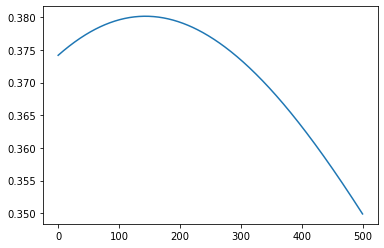

In [57]:
corr = []
for i in J_hist:
#     corr.append(loss(i, bold_bin))
    c = np.corrcoef(np.triu(fc).flatten(), np.triu(i).flatten())[0, 1]
    corr.append(c)
plt.plot(corr)